## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [49]:
#몇차 데이터인지
testcase = "test1"

### input data

In [50]:
inputdata = pd.read_csv('./input-'+testcase+'.csv',skiprows = 6, sep=',')

In [51]:
inputdata

,Name,P1,P2,P3,P4,P5,P6,P7,P8,P10
0,DP 0,80,120.0,110.0,100.0,98.0,85.0,80.0,80.0,0.002414
1,DP 1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6,0.002639
2,DP 2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8,0.002597
3,DP 3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6,0.002549
4,DP 4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8,0.002536
...,...,...,...,...,...,...,...,...,...,...
96,DP 96,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6,0.002395
97,DP 97,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2,0.002536
98,DP 98,80,119.0,104.6,109.8,111.0,89.4,93.0,97.0,0.002611
99,DP 99,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8,0.002535


In [74]:
np.mean(inputdata.iloc[1,1:])

85.13362651666667

In [70]:
inputdata.iloc[0,1:-1]

P1       80
P2    120.0
P3    110.0
P4    100.0
P5     98.0
P6     85.0
P7     80.0
P8     80.0
Name: 0, dtype: object

In [75]:
np.mean(dp1_preform_temp)

Curve Length on Polyline 1 [ m ]      0.052910
TEMPERATURE [ K ]                   370.411846
dtype: float64

In [84]:
list(inputdata)[1:-1]

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P10']

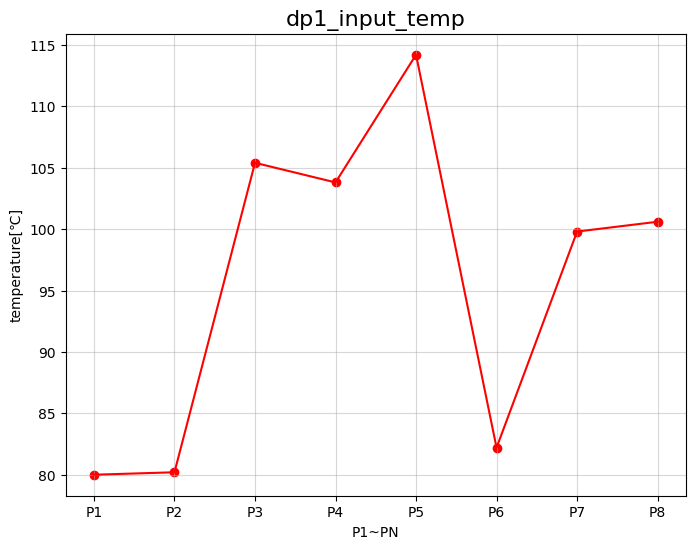

In [85]:
inputdata.iloc[1,1:]
plt.figure(figsize = (8,6))
plt.title("dp1_input_temp",fontsize = 16)
plt.grid(alpha = 0.5)
plt.xlabel('P1~PN')
plt.ylabel('temperature[℃]')
plt.plot(inputdata.iloc[1,1:-1],c = 'r')
plt.scatter(list(inputdata)[1:-1],inputdata.iloc[1,1:-1],c = 'r')

plt.savefig("D:/testoneblow/pictures/"+testcase+"_input_temp.jpg",bbox_inches = 'tight')
plt.show()


### Preform-temp

In [54]:
#몇차 데이터인지
testcase = "test1"

In [55]:
for i in range (100):
    temp_data = pd.read_csv('./'+testcase+'/dp%d-preform-temp.csv'%(i+1),skiprows = 4, sep=',')
    s = "dp%d_preform_temp = temp_data"%(i+1)
    exec(s)

In [56]:
dp1_preform_temp

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ K ]
0,0.000000,373.750000
1,0.002953,373.750000
2,0.005916,373.750000
3,0.008878,373.750000
4,0.011840,373.750000
5,0.014803,373.750000
6,0.017765,373.750000
7,0.020727,373.750000
8,0.023690,373.657806
9,0.026652,373.540253


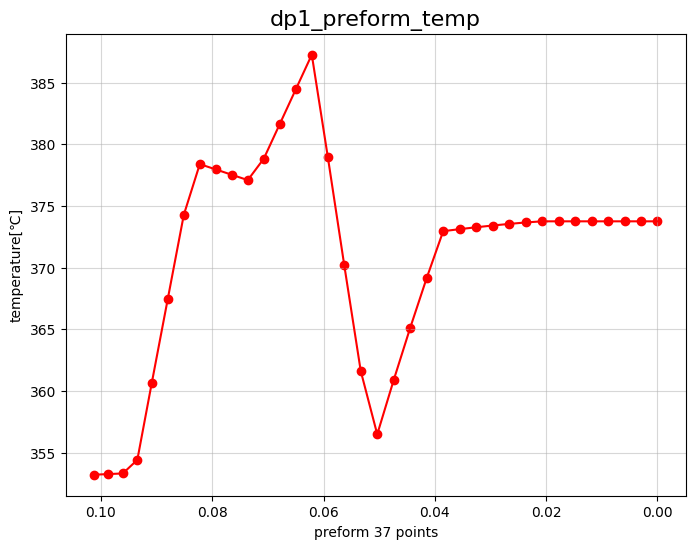

In [64]:
plt.figure(figsize = (8,6))
plt.title("dp1_preform_temp",fontsize = 16)

plt.grid(alpha = 0.5)
plt.xlabel('preform %d points'%(dp1_preform_temp.shape[0]))
plt.ylabel('temperature[℃]')
plt.gca().invert_xaxis()
plt.plot(dp1_preform_temp.iloc[:-1,0],dp1_preform_temp.iloc[:-1,1],c = 'r')
plt.scatter(dp1_preform_temp.iloc[:-1,0],dp1_preform_temp.iloc[:-1,1],c = 'r')
plt.savefig("D:/testoneblow/pictures/"+testcase+"_preform_temp.jpg",bbox_inches = 'tight')
plt.show()


In [11]:
dp1_preform_temp

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ K ]
0,0.000000,373.750000
1,0.002953,373.750000
2,0.005916,373.750000
3,0.008878,373.750000
4,0.011840,373.750000
5,0.014803,373.750000
6,0.017765,373.750000
7,0.020727,373.750000
8,0.023690,373.657806
9,0.026652,373.540253


### Preform-thick

In [17]:
testcase = "test1"

In [18]:
for i in range (100):
    temp_data = pd.read_csv('./'+testcase+'/dp%d-preform-thick.csv'%(i+1),skiprows = 4, sep=',')
    s = "dp%d_preform_thick = temp_data"%(i+1)
    exec(s)

In [227]:
pd.DataFrame(dp1_preform_thick).describe()

,Curve Length on Polyline 1 [ m ],THICKNESS [ mm ]
count,35.000000,35.0
mean,0.023630,3.0
std,0.018427,0.0
min,0.000000,3.0
25%,0.008460,3.0
50%,0.017337,3.0
75%,0.039596,3.0
max,0.055841,3.0


In [228]:
pd.DataFrame(dp47_preform_thick).describe()

,Curve Length on Polyline 1 [ m ],THICKNESS [ mm ]
count,35.000000,35.0
mean,0.023630,3.0
std,0.018427,0.0
min,0.000000,3.0
25%,0.008460,3.0
50%,0.017337,3.0
75%,0.039596,3.0
max,0.055841,3.0


### Preform-xy

In [42]:
for i in range (100):
    temp_data = pd.read_csv('./'+testcase+'/dp%d-preform-xy.csv'%(i+1),skiprows = 4, sep=',')
    s = "dp%d_preform_xy = temp_data"%(i+1)
    exec(s)

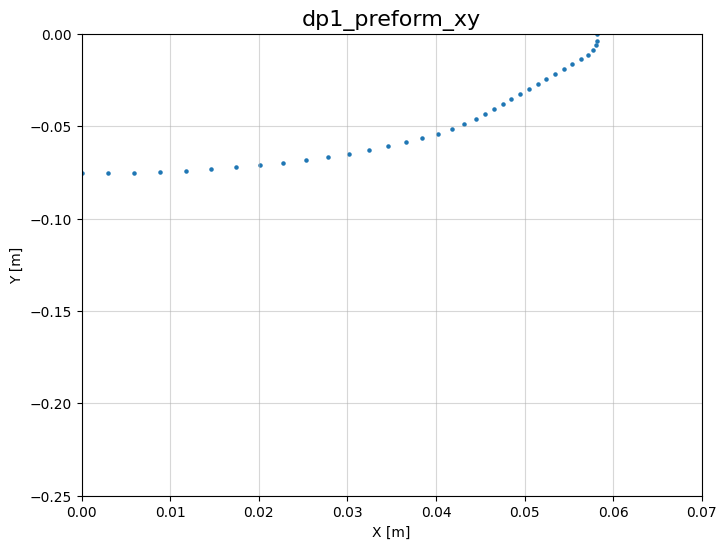

In [48]:
plt.figure(figsize = (8,6))
plt.grid(alpha = 0.5)
plt.title("dp1_preform_xy",fontsize = 16)
plt.xlabel('X [m]')
plt.xlim(0,0.07)
plt.ylabel('Y [m]')
plt.ylim(-0.25,0)
# plt.scatter(dp1_preform_xy.iloc[:,0],dp1_preform_xy.iloc[:,1])




plt.scatter(dp1_preform_xy.iloc[:,0],dp1_preform_xy.iloc[:,1],s = 5)
plt.savefig("D:/testoneblow/pictures/"+testcase+"_preform_thick.jpg",bbox_inches = 'tight')
plt.show()


### Blow-temp

In [317]:
testcase = "test3"

In [318]:
for i in range (100):
    temp_data = pd.read_csv('./'+testcase+'/dp%d-blow-temp.csv'%(i+1),skiprows = 4, sep=',')
    s = "dp%d_blow_temp = temp_data"%(i+1)
    exec(s)

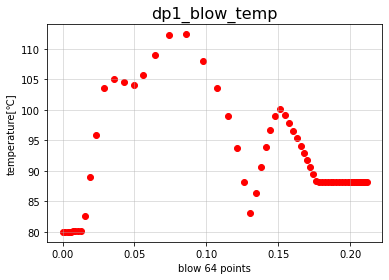

In [348]:
plt.title("dp1_blow_temp",fontsize = 16)
plt.grid(alpha = 0.5)
plt.xlabel('blow %d points'%(dp1_blow_temp.shape[0]))
plt.ylabel('temperature[℃]')
# plt.gca().invert_xaxis()
plt.scatter(dp1_blow_temp.iloc[:,0],dp1_blow_temp.iloc[:,1],c = 'r')
# plt.savefig("D:/testoneblow/pictures/"+testcase+"_blow_temp.jpg",bbox_inches = 'tight')

In [19]:
dp1_blow_temp

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ K ]
0,0.000000,373.750000
1,0.003012,373.750000
2,0.006101,373.750000
3,0.007720,373.750000
4,0.009473,373.750000
...,...,...
56,0.283006,354.505066
57,0.286500,353.303253
58,0.290046,353.256989
59,0.293606,353.203278


### Blow-thick

In [23]:
testcase = "test1"

In [24]:
for i in range (100):
    temp_data = pd.read_csv('./'+testcase+'/dp%d-blow-thick.csv'%(i+1),skiprows = 4, sep=',')
    s = "dp%d_blow_thick = temp_data"%(i+1)
    exec(s)

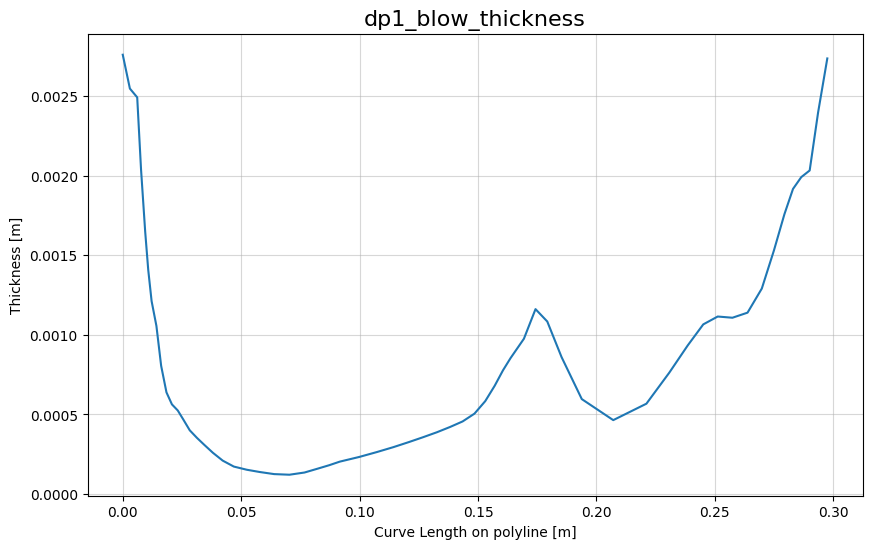

In [26]:
plt.figure(figsize = (10,6))
plt.grid(alpha = 0.5)
plt.title("dp1_blow_thickness",fontsize = 16)
plt.xlabel('Curve Length on polyline [m]')
plt.ylabel('Thickness [m]')
plt.plot(dp1_blow_thick.iloc[:,0],dp1_blow_thick.iloc[:,1])
plt.savefig("D:/testoneblow/pictures/"+testcase+"_blow_thick.jpg",bbox_inches = 'tight')
plt.show()


In [12]:
plt.plot(dp1_blow_thick.iloc[:,0],dp1_blow_thick.iloc[:,1])

In [191]:
start_thick = []
end_thick = []
minimum_thick =[]
for i in range(100):
    
    exec("start_thick = np.append(start_thick,dp%d_blow_thick.iloc[0,1])"%(i+1))
    exec("end_thick   = np.append(end_thick,dp%d_blow_thick.iloc[-1,1])"%(i+1))
    exec("minimum_thick = np.append(minimum_thick,np.min(dp%d_blow_thick.iloc[:,1]))"%(i+1))

In [192]:
pd.DataFrame(start_thick).describe()

,0
count,100.000000
mean,2.927400
std,0.029701
min,2.851981
25%,2.906701
50%,2.931404
75%,2.950369
max,2.979259


In [193]:
pd.DataFrame(end_thick).describe()

,0
count,100.000000
mean,1.649899
std,0.166253
min,1.168712
25%,1.544167
50%,1.646269
75%,1.782069
max,1.950466


In [194]:
pd.DataFrame(minimum_thick).describe()

,0
count,100.000000
mean,0.385172
std,0.101367
min,0.168898
25%,0.297530
50%,0.383891
75%,0.452172
max,0.602356


In [188]:
dp1_blow_thick

,Curve Length on Polyline 1 [ m ],THICKNESS [ mm ]
0,0.000000,2.756750
1,0.001207,2.728230
2,0.002413,2.634510
3,0.003628,2.465400
4,0.004886,2.253689
5,0.006195,2.044643
6,0.007487,1.842477
7,0.008917,1.635479
8,0.010543,1.496757
9,0.012157,1.426402


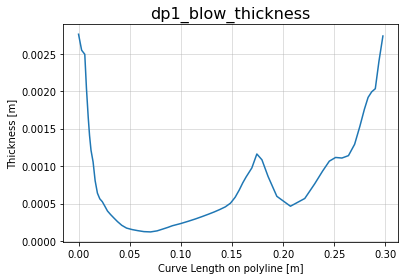

In [39]:
plt.grid(alpha = 0.5)
plt.title("dp1_blow_thickness",fontsize = 16)
plt.xlabel('Curve Length on polyline [m]')
plt.ylabel('Thickness [m]')
plt.plot(dp1_blow_thick.iloc[:,0],dp1_blow_thick.iloc[:,1])
plt.savefig("D:/testoneblow/pictures/"+testcase+"_blow_thick.jpg",bbox_inches = 'tight')

In [32]:
start_thick = []
end_thick = []
for i in range(100):
    exec("start_thick = np.append(start_thick,dp%d_blow_thick.iloc[0,1])"%(i+1))
    exec("end_thick   = np.append(end_thick,dp%d_blow_thick.iloc[-1,1])"%(i+1))

In [35]:
pd.DataFrame(start_thick).describe()

,0
count,100.000000
mean,0.002750
std,0.000032
min,0.002678
25%,0.002730
50%,0.002754
75%,0.002776
max,0.002800


In [36]:
pd.DataFrame(end_thick).describe()

,0
count,100.000000
mean,0.002751
std,0.000020
min,0.002707
25%,0.002739
50%,0.002752
75%,0.002766
max,0.002787


### Blow-xy

In [28]:
testcase = "test1"

In [29]:
for i in range (100):
    temp_data = pd.read_csv('./'+testcase+'/dp%d-blow-xy.csv'%(i+1),skiprows = 4, sep=',')
    s = "dp%d_blow_xy = temp_data"%(i+1)
    exec(s)

In [30]:
dp1_blow_xy

,Z [ m ],Y [ m ]
0,0.000000,-2.231890e-01
1,0.003011,-2.231076e-01
2,0.006097,-2.232591e-01
3,0.007712,-2.233659e-01
4,0.009455,-2.235481e-01
...,...,...
56,0.062608,-1.341187e-02
57,0.061721,-1.003283e-02
58,0.059674,-7.137941e-03
59,0.058237,-3.880623e-03


<Figure size 640x480 with 0 Axes>

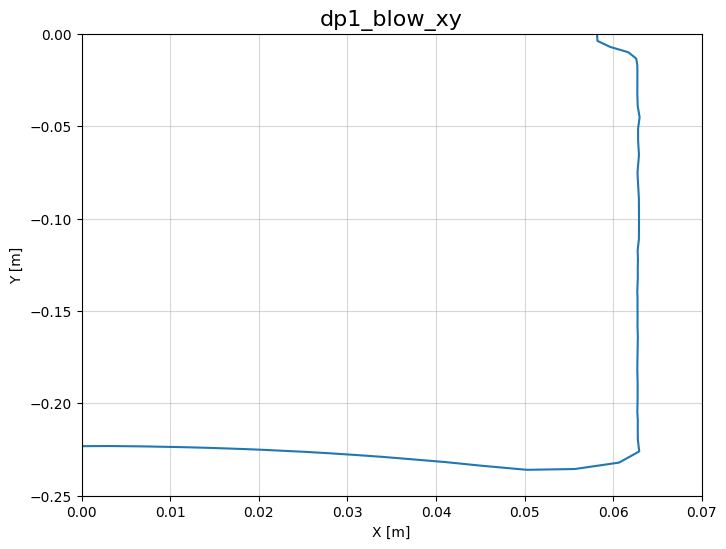

In [35]:
plt.figure(figsize = (8,6))
plt.grid(alpha = 0.5)
plt.title("dp1_blow_xy",fontsize = 16)
plt.xlabel('X [m]')
plt.xlim(0,0.07)
plt.ylabel('Y [m]')
plt.ylim(-0.25,0)
plt.plot(dp1_blow_xy.iloc[:,0],dp1_blow_xy.iloc[:,1])
plt.savefig("D:/testoneblow/pictures/"+testcase+"_blow_thick.jpg",bbox_inches = 'tight')
plt.show()
# plt.scatter(dp1_blow_xy.iloc[:,0],dp1_blow_xy.iloc[:,1])
